In [1]:
import pandas as pd
import numpy as np

In [2]:
data  = pd.read_csv('Rain Prediction Train.csv')


In [3]:
data.shape

(100000, 23)

In [4]:
#1 Find the windy (Highest wind speed and frequent high-speed winds) places to build a windmill. Also find the sunny places to setup a solar field. Take values more than 75 percentile as minimum values for analysis.

In [5]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,07-02-2014,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,76.0,66.0,1017.3,1016.5,7.0,4.0,21.5,24.2,Yes,No
1,23-04-2009,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,65.0,37.0,1014.0,1008.8,7.0,8.0,14.0,21.8,No,Yes
2,08-11-2015,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,71.0,28.0,1022.5,1019.4,2.0,7.0,12.8,23.6,No,No
3,21-11-2012,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,65.0,76.0,1017.0,1010.6,NaN,NaN,18.9,20.6,No,No
4,30-07-2013,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,61.0,46.0,1016.8,1011.8,1.0,1.0,21.7,25.6,No,No


In [6]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
#1.Find the windy (Highest wind speed and frequent high-speed winds) places to build a windmill.
#Also find the sunny places to setup a solar field.
#Take values more than 75 percentile as minimum values for analysis.
data['Location'].nunique()

49

In [8]:
data1 = data['WindGustSpeed'].quantile(0.75)
data2 = data[data['WindGustSpeed'] > data1]
data2['WindGustSpeed'].count()

20621

In [9]:
#highest wind speed places above 0.75
data2[['Location','WindGustSpeed']].sort_values(by = 'WindGustSpeed',ascending = False).head()

,Location,WindGustSpeed
72545,Woomera,135.0
7197,Townsville,135.0
35513,Hobart,130.0
24271,Wollongong,126.0
54132,Woomera,122.0


In [10]:
#frequent high speeds
data3 = data2.groupby('Location')['WindGustSpeed'].mean()
data3.sort_values(ascending = False).head()

Location
Hobart              64.500554
MountGinini         63.937158
Melbourne           62.934848
MelbourneAirport    62.910501
Sale                62.797678
Name: WindGustSpeed, dtype: float64

In [11]:
#highest sunshine
data4 = data['Sunshine'].quantile(0.75)
data5 = data[data['Sunshine']>data4]
data5[['Location','Sunshine']].sort_values(by = 'Sunshine',ascending = False).head()

,Location,Sunshine
80170,Mildura,14.5
61353,Nuriootpa,14.3
57670,Dartmoor,14.3
75820,Portland,14.3
79091,Hobart,14.2


In [12]:
#frequent high sunshine
data6 = data5.groupby('Location')['Sunshine'].mean()
data6.sort_values(ascending = False).head()

Location
WaggaWagga    12.230000
Dartmoor      12.208955
Adelaide      12.171390
PearceRAAF    12.167286
Portland      12.161458
Name: Sunshine, dtype: float64

In [ ]:
#2. Find the locations where humidity and temperature are more than 80 percentile value.


In [14]:
data7 = data['Humidity9am'].quantile(0.80)
data8 = data['Humidity3pm'].quantile(0.80)
data9 = data['Temp9am'].quantile(0.80)
data10 = data['Temp3pm'].quantile(0.80)

In [16]:
data11 = data[(data['Humidity9am']>data7) & (data['Humidity3pm']>data8) & (data['Temp9am']>data9) & (data['Temp3pm']>data10)]
data11[['Humidity9am','Humidity3pm','Temp9am','Temp3pm']].head()

,Humidity9am,Humidity3pm,Temp9am,Temp3pm
110,92.0,70.0,24.7,28.9
364,94.0,81.0,26.6,29.0
556,98.0,73.0,23.9,28.2
2083,87.0,76.0,27.7,28.8
2737,98.0,76.0,24.9,29.0


In [ ]:
#3. Find 3 places where rainfall, sunshine, humidity is not too high or too low[ Use logical threshold using percentile values]

In [18]:
data_1 = data['Humidity9am'].quantile(0.50)
data_2 = data['Humidity3pm'].quantile(0.50)
data_3 = data['Rainfall'].quantile(0.50)
data_4 = data['Sunshine'].quantile(0.50)
data_5 = data[(data['Humidity9am'] > data_1) & (data['Humidity3pm'] > data_2) & (data['Rainfall'] > data_3) & (data['Sunshine'] > data_4)]
data_5.head()
data_5[['Location','Humidity9am','Humidity3pm','Rainfall','Sunshine']].sort_values(['Location','Humidity9am','Humidity3pm','Rainfall','Sunshine'],ascending = True).head()

,Location,Humidity9am,Humidity3pm,Rainfall,Sunshine
46922,Adelaide,71.0,55.0,1.4,13.1
18933,Adelaide,71.0,63.0,0.4,8.7
23513,Adelaide,75.0,60.0,1.2,9.1
80985,Adelaide,75.0,61.0,0.4,8.9
17407,Adelaide,86.0,58.0,3.2,9.0


In [ ]:
#4. Find the top 3 places where rainfall is high, but cloud cover is low and vice versa. Take cloud cover avg>5.

In [23]:
data_6 = data[(data['Cloud9am'] > 5) & (data['Cloud3pm'] > 5)]
data_6.shape

(19331, 23)

In [37]:
med_rain = data_6['Rainfall'].median()
med_cloud3 = data_6['Cloud3pm'].median()
med_cloud9 = data_6['Cloud9am'].median()
data_7 = data_6[(data_6['Rainfall'] > med_rain) & (data_6['Cloud3pm'] < med_cloud3) & (data_6['Cloud9am'] < med_cloud9)]
data_7[['Location','Rainfall','Cloud3pm','Cloud9am']].sort_values(by = 'Rainfall', ascending = False).head()

,Location,Rainfall,Cloud3pm,Cloud9am
99271,Newcastle,240.0,6.0,6.0
71343,NorfolkIsland,111.0,6.0,6.0
25919,Cairns,58.4,6.0,6.0
18809,Newcastle,46.8,6.0,6.0
84864,NorfolkIsland,39.0,6.0,6.0


In [39]:
# vice - versa
data_8 = data_6[(data_6['Rainfall'] < med_rain) & (data_6['Cloud3pm'] > med_cloud3) & (data_6['Cloud9am'] > med_cloud9)]
data_8[['Location','Rainfall','Cloud3pm','Cloud9am']].sort_values(by = 'Rainfall', ascending = True).head()

,Location,Rainfall,Cloud3pm,Cloud9am
82,Albany,0.0,8.0,8.0
65557,Portland,0.0,8.0,8.0
65541,Ballarat,0.0,8.0,8.0
65490,Cobar,0.0,8.0,8.0
65489,Portland,0.0,8.0,8.0


In [ ]:
#5. Which wind direction causes rains in which cities ?

In [40]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [51]:
data_9 = data[data['RainTomorrow'] == 'Yes']
data_10 = data_9.groupby(['WindGustDir','Location'])['RainTomorrow'].count()
data_10.sort_values(ascending = False)

WindGustDir  Location        
SE           Cairns              237
W            Portland            182
NNW          Launceston          170
N            MelbourneAirport    153
             Melbourne           148
S            NorahHead           148
SSE          GoldCoast           131
             Cairns              128
NW           Walpole             126
S            Wollongong          122
WNW          Portland            113
S            SydneyAirport       112
SSW          SydneyAirport       112
W            Sale                109
SE           GoldCoast           106
N            Ballarat            103
             Watsonia            103
NW           MountGinini         102
             Launceston          100
SSE          NorahHead            96
S            CoffsHarbour         94
NW           Hobart               94
W            MountGambier         93
             Nuriootpa            92
WNW          Darwin               90
E            Brisbane             90
ENE     

In [47]:
data['WindGustDir'].unique()

array(['NNE', 'WSW', 'SSW', 'ENE', nan, 'E', 'SW', 'WNW', 'N', 'SSE', 'W',
       'S', 'SE', 'NNW', 'NW', 'NE', 'ESE'], dtype=object)

In [ ]:
#6. Find top 5 coastal cities in which evaporation is higher than mean so that we can choose these places for salt preparation plants?

In [64]:
dat1 = data['Evaporation'].mean()
dat2 = data[data['Evaporation'] > dat1]
dat2.groupby('Location')['Evaporation'].sum().sort_values(ascending = False).head(5)

Location
Woomera         16055.3
AliceSprings    15903.0
Townsville      12820.7
Darwin          10911.4
Moree            9950.5
Name: Evaporation, dtype: float64

In [ ]:
#7. Suggest a strategy to a winter goods company to choose the location and months to promote their products.

In [65]:
data['Date']=pd.to_datetime(data['Date'])
data['day']=data['Date'].dt.day
data['month']=data['Date'].dt.month
data['year']=data['Date'].dt.year

In [66]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,2014-07-02,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,1016.5,7.0,4.0,21.5,24.2,Yes,No,2,7,2014
1,2009-04-23,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,1008.8,7.0,8.0,14.0,21.8,No,Yes,23,4,2009
2,2015-08-11,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,1019.4,2.0,7.0,12.8,23.6,No,No,11,8,2015
3,2012-11-21,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,1010.6,NaN,NaN,18.9,20.6,No,No,21,11,2012
4,2013-07-30,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,1011.8,1.0,1.0,21.7,25.6,No,No,30,7,2013
5,2016-05-20,Albany,10.1,21.8,0.0,0.8,NaN,NaN,NaN,N,...,1003.9,1.0,NaN,12.9,NaN,No,Yes,20,5,2016
6,2011-01-20,Sale,12.5,24.7,0.0,6.4,6.6,E,31.0,NE,...,1010.9,7.0,3.0,17.5,23.1,No,No,20,1,2011
7,2016-02-24,Moree,19.9,35.0,0.0,10.2,12.5,NNE,37.0,N,...,1013.3,0.0,1.0,24.2,34.4,No,No,24,2,2016
8,2009-04-28,Portland,7.1,13.0,3.6,1.4,3.4,SW,37.0,S,...,1022.7,4.0,6.0,9.7,11.7,Yes,No,28,4,2009
9,2016-08-07,Penrith,12.5,16.9,0.8,NaN,NaN,SW,26.0,SSW,...,NaN,NaN,NaN,13.3,13.1,No,Yes,7,8,2016


In [90]:
dat3=data.groupby(['Location','month'])['MinTemp'].mean()
dat3.sort_values()
# dat3 = data['MinTemp'].mean()
# dat4 = data[data['MinTemp'] < dat3]
# dat5 = dat4.groupby('month')['MinTemp'].count().median()
# dat6 = dat4[dat4['month'] > dat5]
# dat6

Location     month
MountGinini  7        -0.012575
             8         0.533333
             6         1.094220
             9         1.554140
             5         2.008485
Canberra     7         2.731771
MountGinini  10        3.145402
Tuggeranong  7         3.294318
Canberra     6         3.345960
             8         3.466492
             5         3.593750
MountGinini  4         3.598758
Tuggeranong  5         3.950000
             8         3.950581
             6         4.242197
Launceston   7         4.735882
Ballarat     6         4.799419
Launceston   6         4.826374
Ballarat     7         5.013143
Canberra     9         5.053922
MountGinini  11        5.151829
Bendigo      7         5.298315
             6         5.373514
Tuggeranong  9         5.443258
Sale         6         5.575916
Ballarat     8         5.576536
Launceston   8         5.606044
Albury       6         5.608982
Bendigo      8         5.633333
WaggaWagga   7         5.638953
                     

In [85]:
dat4.groupby('month')['MinTemp'].count().median()

4166.0

In [ ]:
#8. What factors effect tomorrow rain column the most in weather dataset ?

In [92]:
percent_null=100 - (data.count()/len(data))*100
percent_null

Date              0.000
Location          0.000
MinTemp           0.436
MaxTemp           0.216
Rainfall          0.970
Evaporation      42.633
Sunshine         47.482
WindGustDir       6.581
WindGustSpeed     6.540
WindDir9am        7.062
WindDir3pm        2.691
WindSpeed9am      0.938
WindSpeed3pm      1.854
Humidity9am       1.238
Humidity3pm       2.544
Pressure9am       9.837
Pressure3pm       9.812
Cloud9am         37.628
Cloud3pm         40.011
Temp9am           0.620
Temp3pm           1.910
RainToday         0.970
RainTomorrow      0.000
day               0.000
month             0.000
year              0.000
dtype: float64

In [94]:
import missingno as mno

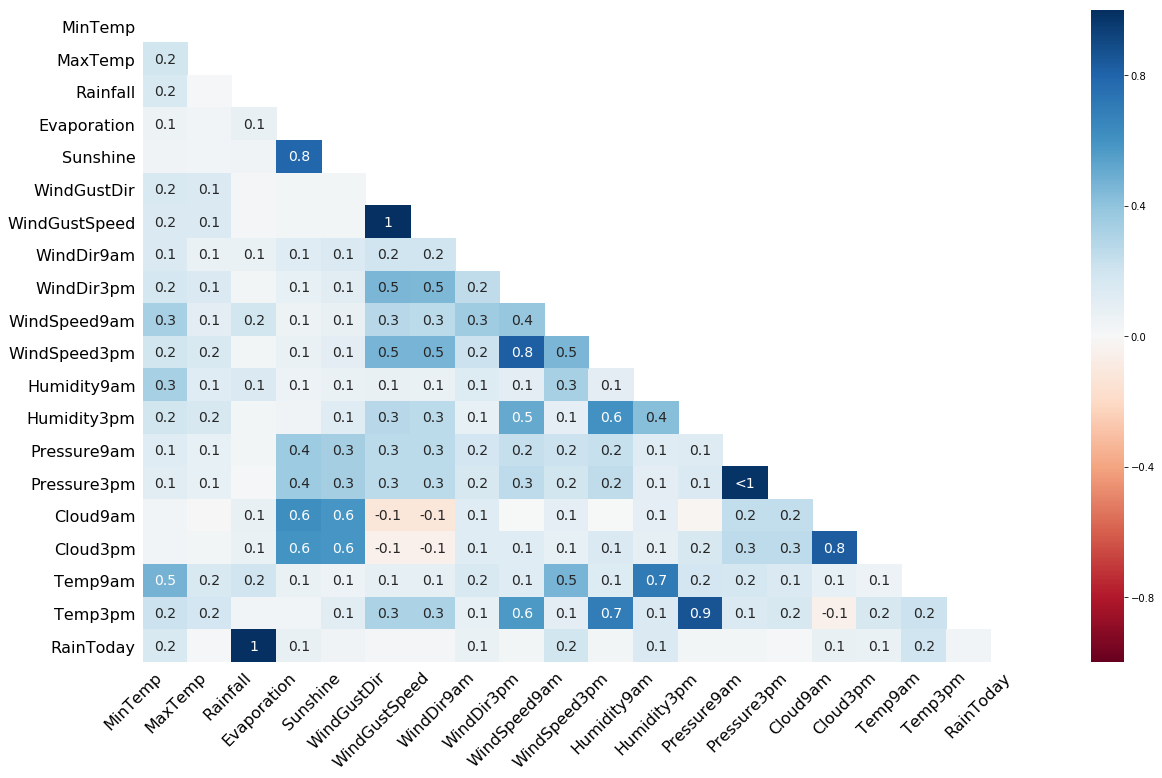

In [99]:
mno.heatmap(data)

In [105]:
tble = pd.crosstab(index = data['RainTomorrow'],columns = data['WindDir3pm'])
tble

WindDir3pm,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
RainTomorrow,,,,,,,,,,,,,,,,
No,4768,4465,4849,4372,4643,3445,3892,4311,5273,6131,5191,4428,5186,5165,4338,5097
Yes,1009,979,1019,1697,1099,1102,1507,1686,1434,1437,1239,1299,1260,1767,1723,1498


In [106]:
tble1 = pd.crosstab(index = data['RainTomorrow'],columns = data['WindGustDir'])
tble1

WindGustDir,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
RainTomorrow,,,,,,,,,,,,,,,,
No,5443,4751,4303,4552,4055,3441,3287,4037,4840,5280,5112,4733,4944,5040,4075,4784
Yes,962,938,853,1688,918,1079,1352,1628,1391,1228,1208,1355,1249,1817,1592,1484


In [108]:
tble2 = pd.crosstab(index = data['RainTomorrow'],columns = data['WindDir9am'])
tble2

WindDir9am,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
RainTomorrow,,,,,,,,,,,,,,,,
No,5400,4449,4582,5534,4198,4082,3756,4348,4791,5377,5195,4086,4450,4234,3700,3597
Yes,964,957,790,2462,1098,1469,1746,1721,1194,1044,1122,1186,1323,1509,1358,1216


In [109]:
tble3 = pd.crosstab(index = data['RainTomorrow'],columns = data['Sunshine'])
tble3

Sunshine,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,13.5,13.6,13.7,13.8,13.9,14.0,14.1,14.2,14.3,14.5
RainTomorrow,,,,,,,,,,,,,,,,,,,,,
No,453,135,150,138,91,86,90,105,99,111,...,116,136,84,28,15,6,5,1,3,1
Yes,1192,234,219,168,127,140,115,125,123,116,...,2,0,0,1,1,0,0,0,0,0


In [110]:
tble4 = pd.crosstab(index = data['RainTomorrow'],columns = data['RainToday'])
tble4

RainToday,No,Yes
RainTomorrow,,
No,65233,11768
Yes,11740,10289


In [113]:
tble5 = pd.crosstab(index = data['RainTomorrow'],columns = data['Temp3pm'])
tble5

Temp3pm,-5.4,-5.1,-4.4,-4.2,-4.1,-4.0,-3.9,-3.8,-3.7,-3.5,...,44.9,45.0,45.2,45.3,45.4,45.8,45.9,46.1,46.2,46.7
RainTomorrow,,,,,,,,,,,,,,,,,,,,,
No,1,1,0,0,0,0,1,0,1,0,...,0,1,2,2,1,2,1,1,1,1
Yes,0,0,1,1,1,1,1,1,2,2,...,1,0,0,0,0,0,0,0,0,0


In [114]:
tble6 = pd.crosstab(index = data['RainTomorrow'],columns = data['Temp9am'])
tble6

Temp9am,-7.2,-6.2,-5.9,-5.6,-5.5,-5.3,-5.2,-4.5,-4.4,-4.3,...,37.5,37.6,37.7,37.9,38.2,38.3,38.6,38.9,39.0,39.4
RainTomorrow,,,,,,,,,,,,,,,,,,,,,
No,1,1,1,2,1,2,2,0,0,2,...,1,2,3,1,1,1,1,1,1,1
Yes,0,0,0,0,1,0,3,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [96]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,2014-07-02,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,1016.5,7.0,4.0,21.5,24.2,Yes,No,2,7,2014
1,2009-04-23,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,1008.8,7.0,8.0,14.0,21.8,No,Yes,23,4,2009
2,2015-08-11,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,1019.4,2.0,7.0,12.8,23.6,No,No,11,8,2015
3,2012-11-21,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,1010.6,NaN,NaN,18.9,20.6,No,No,21,11,2012
4,2013-07-30,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,1011.8,1.0,1.0,21.7,25.6,No,No,30,7,2013


In [ ]:
# 9. Create a new column as rainfall level with values as no, low, medium, high, heavy as categories and do the bivariate analyses between rainfall level and wind direction - no rain ------> 0 percentile -low --------->0-25 percentile -medium--------->25-50 percentile -high--------->50-75 percentile -heavy--------->75-100 percentile

In [124]:
data.loc[data.Rainfall == data['Rainfall'].quantile(0), 'rainfall_level'] = 'no rain' 
data.loc[(data.Rainfall >  data['Rainfall'].quantile(0)) & (data.Rainfall <=  data['Rainfall'].quantile(0.25)), 'rainfall_level'] = 'low'  
data.loc[(data.Rainfall >  data['Rainfall'].quantile(0.25)) & (data.Rainfall <=  data['Rainfall'].quantile(0.50)), 'rainfall_level'] = 'medium'
data.loc[(data.Rainfall >  data['Rainfall'].quantile(0.50)) & (data.Rainfall <=  data['Rainfall'].quantile(0.75)), 'rainfall_level'] = 'high'
data.loc[(data.Rainfall >  data['Rainfall'].quantile(0.75)) & (data.Rainfall <=  data['Rainfall'].quantile(1.0)), 'rainfall_level'] = 'heavy' 

In [125]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year,rainfall_level
0,2014-07-02,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,7.0,4.0,21.5,24.2,Yes,No,2,7,2014,heavy
1,2009-04-23,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,7.0,8.0,14.0,21.8,No,Yes,23,4,2009,no rain
2,2015-08-11,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,2.0,7.0,12.8,23.6,No,No,11,8,2015,no rain
3,2012-11-21,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,NaN,NaN,18.9,20.6,No,No,21,11,2012,no rain
4,2013-07-30,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,1.0,1.0,21.7,25.6,No,No,30,7,2013,no rain


In [126]:
tblee = pd.crosstab(index = data['rainfall_level'],columns = data['WindGustDir'])
tblee

WindGustDir,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
rainfall_level,,,,,,,,,,,,,,,,
heavy,1018,918,1028,1079,749,712,1038,1443,1875,1450,1592,1895,1913,2283,1729,2079
high,599,493,504,741,446,455,527,622,724,695,681,680,704,860,700,723
no rain,4724,4231,3586,4351,3738,3307,3037,3563,3565,4317,3992,3459,3505,3662,3164,3405


In [127]:
from scipy.stats import chi2_contingency

In [128]:
chi2_contingency(tblee)

(2610.2656539376267,
 0.0,
 30,
 array([[1562.00928037, 1389.8212206 , 1260.74175949, 1520.13235596,
         1215.16981234, 1102.10211644, 1133.63297717, 1386.37253271,
         1518.40801201, 1591.81579715, 1543.28783181, 1486.38448159,
         1508.06194834, 1676.30865051, 1377.75081298, 1529.00041054],
        [ 695.61169391,  618.93095364,  561.4478236 ,  676.96258683,
          541.15320707,  490.80061797,  504.84229859,  617.39514482,
          676.19468243,  708.88547012,  687.27444604,  661.93360054,
          671.58725597,  746.51278616,  613.55562278,  680.91180951],
        [4083.37902572, 3633.24782576, 3295.81041691, 3973.90505721,
         3176.67698059, 2881.09726559, 2963.52472424, 3624.23232247,
         3969.39730556, 4161.29873273, 4034.43772215, 3885.68191787,
         3942.35079569, 4382.17856333, 3601.69356424, 3997.08777995]]))

In [ ]:
#10. Plot the correlation heatmap between the numerical variables.

In [75]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

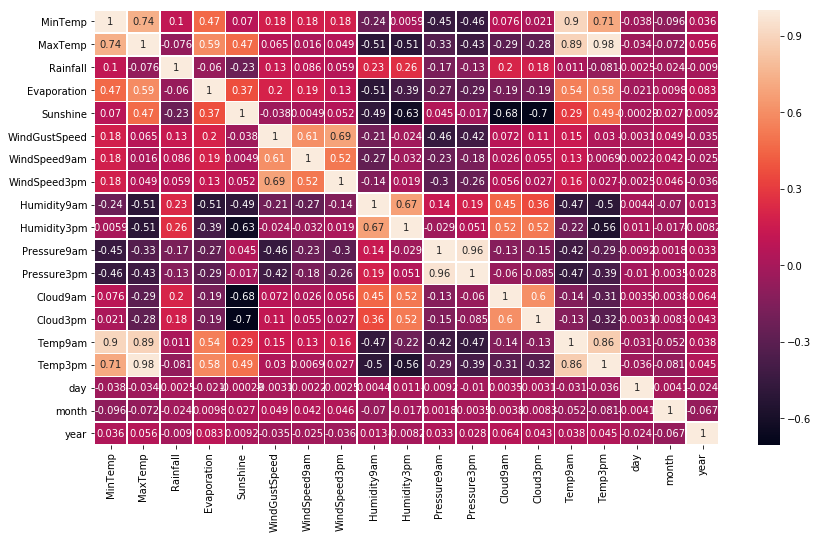

In [77]:
data_numeric = data._get_numeric_data()
cor = data_numeric.corr()
plt.figure(figsize=(14,8))
sb.heatmap(cor,annot = True,linewidths = 0.5)